### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Import dataset

In [3]:
data = pd.read_csv('E:\M.Tech\Dataset/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Summarize the data

In [4]:
col_name = data.columns
col_name

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Statistical details

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# row of each class
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualize the dataset

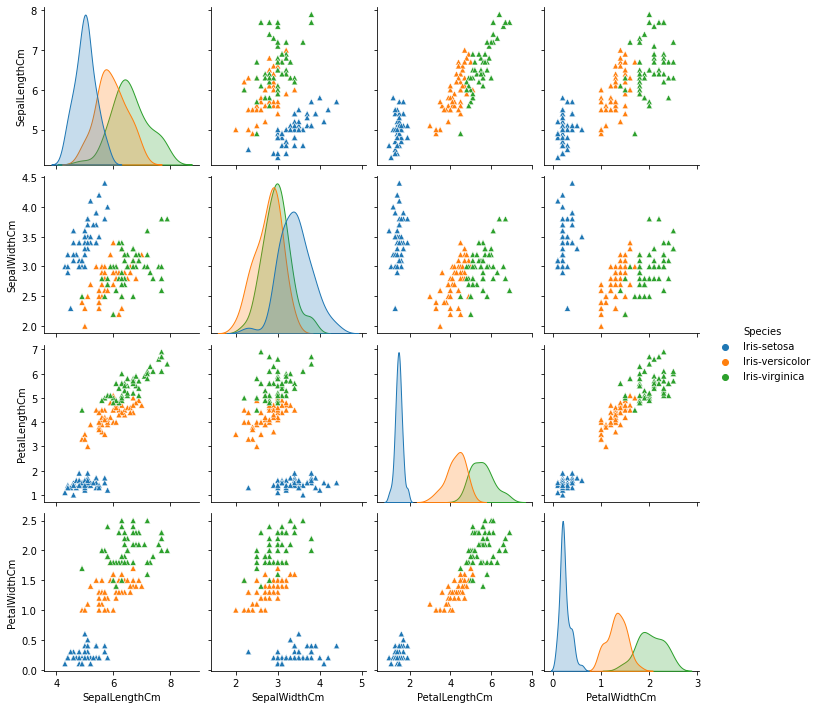

In [9]:
data1 = data.iloc[:, 1:6]
sns.pairplot(data1, hue='Species', markers='^')

### Cheak correlation using Heatmap

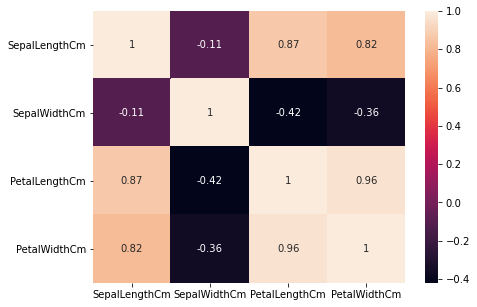

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Splitting the data

In [18]:
X = data1.drop(['Species'], axis=1)
Y = data1['Species']
print("X shape: " + str(X.shape) + " | Y shape: " + str(Y.shape))

X shape: (150, 4) | Y shape: (150,)


In [19]:
# here X have 150 rows and 4 columns
#      Y have 150 rows and 1 columns only

### Import model and train-test-split dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Feature scalling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
## here we use Logistic regression for training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

### Predict test set results

In [26]:
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)

### Create confusion matrix

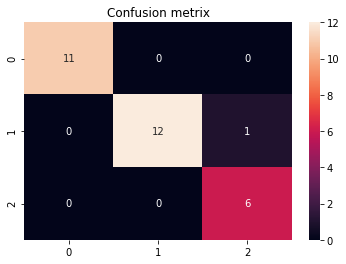

In [28]:
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)
ax = plt.axes()
ax.set_title("Confusion metrix")
plt.show()